In [1]:
# !pip install --upgrade numpy

In [2]:
!pip install torch

In [3]:
!pip install torch_geometric

In [4]:
!pip install lightning

In [5]:
!pip install biopython networkx

In [6]:
from Bio.PDB import PDBParser
import numpy as np

def preprocess_pdb(file_path, distance_threshold=8.0):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", file_path)

    atoms = [atom for atom in structure.get_atoms()]
    num_atoms = len(atoms)
    
    # Initialize matrices
    coordinates = np.zeros((num_atoms, 3))
    atom_types = []
    adjacency_matrix = np.zeros((num_atoms, num_atoms))

    for i, atom in enumerate(atoms):
        coordinates[i] = atom.coord
        atom_types.append(atom.element)
    
    # Compute adjacency matrix based on distance threshold
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            distance = np.linalg.norm(coordinates[i] - coordinates[j])
            if distance < distance_threshold:
                adjacency_matrix[i][j] = adjacency_matrix[j][i] = 1

    return coordinates, atom_types, adjacency_matrix

# Use the function on your file
file_path = "6qmc.pdb"
coordinates, atom_types, adjacency_matrix = preprocess_pdb(file_path)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def display_adjacency_matrix(adjacency_matrix):
    print("Adjacency Matrix:")
    print(adjacency_matrix)
    
    # Visualize as a heatmap
    plt.figure(figsize=(8, 8))
    plt.imshow(adjacency_matrix, cmap='Blues', interpolation='none')
    plt.colorbar()
    plt.title("Adjacency Matrix Heatmap")
    plt.xlabel("Atoms")
    plt.ylabel("Atoms")
    plt.show()

In [8]:
def display_atom_data(coordinates, atom_types):
    print("Atom Coordinates and Types:")
    for i, (coord, atom_type) in enumerate(zip(coordinates, atom_types)):
        print(f"Atom {i + 1} - Type: {atom_type}, Coordinates: {coord}")


In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_3d_coordinates(coordinates, atom_types):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Unique colors for each atom type
    unique_types = list(set(atom_types))
    colors = plt.cm.jet(np.linspace(0, 1, len(unique_types)))
    color_map = {atype: colors[i] for i, atype in enumerate(unique_types)}
    
    # Gather data for plotting
    xs, ys, zs, color_values = [], [], [], []
    for coord, atom_type in zip(coordinates, atom_types):
        xs.append(coord[0])
        ys.append(coord[1])
        zs.append(coord[2])
        color_values.append(color_map[atom_type])  # Add color for each atom type
    
    # Plot all points at once, with their color values
    ax.scatter(xs, ys, zs, c=color_values)

    # Unique legend entries for each atom type
    handles = [plt.Line2D([0], [0], marker='o', color=color_map[atype], linestyle='', markersize=6) 
               for atype in unique_types]
    ax.legend(handles, unique_types, title="Atom Types", loc="upper right")
    
    ax.set_title("3D Scatter Plot of Atom Coordinates")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_zlabel("Z Coordinate")
    plt.show()


Atom Coordinates and Types:
Atom 1 - Type: N, Coordinates: [21.13199997 53.43199921 59.39699936]
Atom 2 - Type: C, Coordinates: [20.95199966 52.9469986  58.        ]
Atom 3 - Type: C, Coordinates: [20.91300011 54.09799957 57.01399994]
Atom 4 - Type: O, Coordinates: [20.74500084 55.26699829 57.39699936]
Atom 5 - Type: N, Coordinates: [21.06699944 53.77500153 55.74000168]
Atom 6 - Type: C, Coordinates: [21.15099907 54.80400085 54.73099899]
Atom 7 - Type: C, Coordinates: [19.91699982 54.71300125 53.82799911]
Atom 8 - Type: O, Coordinates: [19.34499931 53.63000107 53.60200119]
Atom 9 - Type: C, Coordinates: [22.50099945 54.68000031 54.01900101]
Atom 10 - Type: C, Coordinates: [23.67300034 54.90299988 54.96500015]
Atom 11 - Type: C, Coordinates: [24.99799919 54.34000015 54.49399948]
Atom 12 - Type: N, Coordinates: [25.59499931 55.13899994 53.43399811]
Atom 13 - Type: C, Coordinates: [26.11199951 56.35400009 53.60200119]
Atom 14 - Type: N, Coordinates: [26.04299927 56.94599915 54.78300095]
A

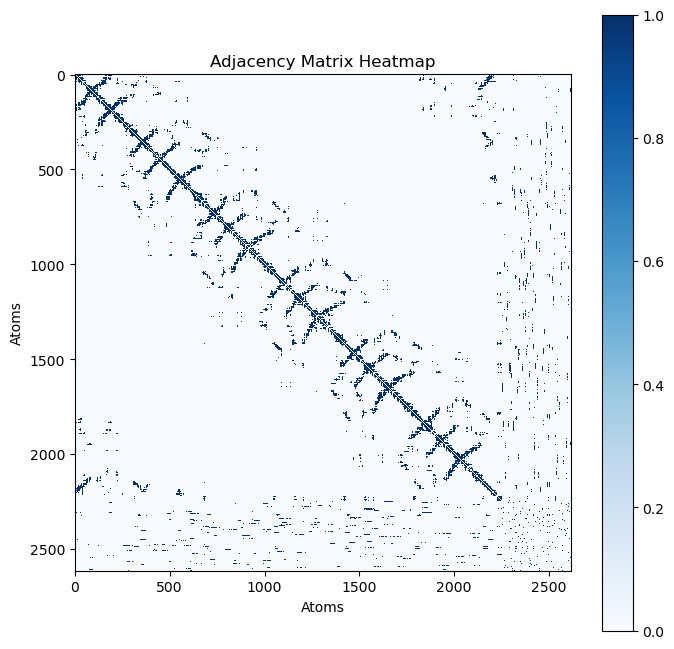

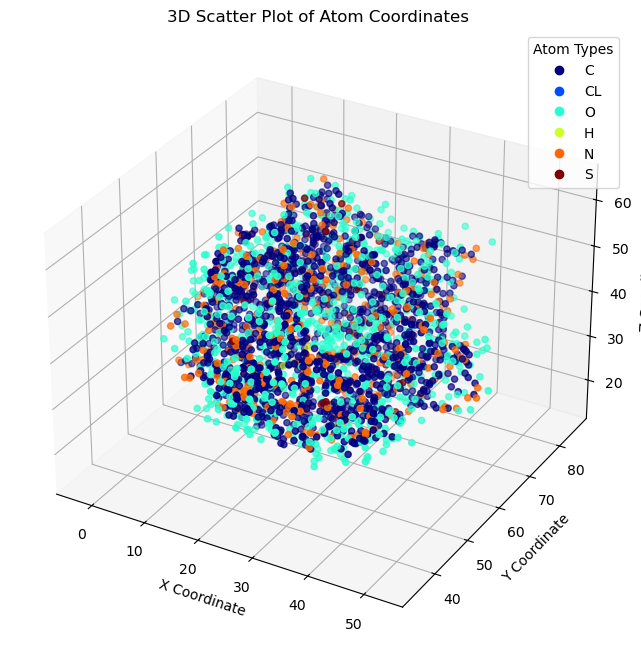

In [10]:
# Assuming you've run the preprocessing code
coordinates, atom_types, adjacency_matrix = preprocess_pdb(file_path)

# Display atom coordinates and types
display_atom_data(coordinates, atom_types)

# Display adjacency matrix
display_adjacency_matrix(adjacency_matrix)

# Plot 3D coordinates
plot_3d_coordinates(coordinates, atom_types)

In [11]:
import numpy as np

def normalize_adjacency(adjacency_matrix):
    degrees = np.sum(adjacency_matrix, axis=1)
    degree_matrix = np.diag(1.0 / np.sqrt(degrees))
    normalized_adjacency = degree_matrix @ adjacency_matrix @ degree_matrix
    return normalized_adjacency

In [12]:
import numpy as np

def normalize_adjacency(adjacency_matrix):
    # Compute the degree matrix
    degrees = np.sum(adjacency_matrix, axis=1)  # Sum of each row gives node degrees
    degree_matrix = np.diag(1.0 / np.sqrt(degrees + 1e-10))  # Add a small value to prevent division by zero
    
    # Apply normalization: D^(-1/2) * A * D^(-1/2)
    normalized_adjacency = degree_matrix @ adjacency_matrix @ degree_matrix
    return normalized_adjacency

# Example usage
# adjacency_matrix is your input adjacency matrix
normalized_adjacency_matrix = normalize_adjacency(adjacency_matrix)
print("Normalized Adjacency Matrix:")
print(normalized_adjacency_matrix)

Normalized Adjacency Matrix:
[[0.         0.0216574  0.01952172 ... 0.         0.         0.        ]
 [0.0216574  0.         0.01733438 ... 0.         0.         0.        ]
 [0.01952172 0.01733438 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.02151657]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02151657 0.         0.        ]]


In [13]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from Bio.PDB import PDBParser
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Step 1: Parse PDB File
def parse_pdb(file_path, distance_threshold=5.0):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("protein", file_path)
    
    nodes = []  # Node features (atom types)
    coordinates = []  # Atom coordinates
    adjacency_matrix = []

    # Extract atom-level information
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    nodes.append(atom.element)  # Atom type
                    coordinates.append(atom.coord)  # Atom coordinates

    # Convert to numpy arrays
    coordinates = np.array(coordinates)
    n_atoms = len(coordinates)

    # Construct adjacency matrix based on distance threshold
    adjacency_matrix = np.zeros((n_atoms, n_atoms), dtype=int)
    for i in range(n_atoms):
        for j in range(i + 1, n_atoms):
            dist = np.linalg.norm(coordinates[i] - coordinates[j])
            if dist <= distance_threshold:
                adjacency_matrix[i, j] = 1
                adjacency_matrix[j, i] = 1

    return nodes, coordinates, adjacency_matrix

# Parse the PDB file
nodes, coordinates, adjacency_matrix = parse_pdb("6qmc.pdb")

# Step 2: Create Node Features
# def encode_atom_types(atom_types):
#     encoder = OneHotEncoder(sparse=False)
#     atom_types_onehot = encoder.fit_transform(np.array(atom_types).reshape(-1, 1))
#     return atom_types_onehot

def encode_atom_types(atom_types):
    encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
    atom_types_onehot = encoder.fit_transform(np.array(atom_types).reshape(-1, 1))
    return atom_types_onehot

node_features = encode_atom_types(nodes)

# Convert adjacency matrix to edge_index format
edge_index = torch.tensor(adjacency_matrix.nonzero(), dtype=torch.long)
node_features = torch.tensor(node_features, dtype=torch.float)

# Create the graph data object
graph_data = Data(x=node_features, edge_index=edge_index)

# Step 3: Define the GCN Model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Step 4: Initialize the Model and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(input_dim=node_features.shape[1], hidden_dim=32, output_dim=2).to(device)  # Binary classification
graph_data = graph_data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)

# Placeholder labels (use actual labels for PPI prediction)
labels = torch.randint(0, 2, (graph_data.num_nodes,)).to(device)

# Step 5: Training and Testing Loops
def train():
    model.train()
    optimizer.zero_grad()
    out = model(graph_data)
    loss = F.nll_loss(out, labels)
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    with torch.no_grad():
        out = model(graph_data)
        pred = out.argmax(dim=1)
        correct = pred.eq(labels).sum().item()
        acc = correct / len(labels)
    return acc

# Train the model
best_acc = 0
for epoch in range(100):
    loss = train()
    acc = test()
    if acc > best_acc:
        best_acc = acc
    if epoch % 10 == 0:
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

print(f"Best Accuracy: {best_acc:.4f}")

C:\Users\Niloy\AppData\Local\Temp\ipykernel_12156\1042768011.py:58: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  edge_index = torch.tensor(adjacency_matrix.nonzero(), dtype=torch.long)


Epoch: 000, Loss: 0.6958, Accuracy: 0.5101
Epoch: 010, Loss: 0.6939, Accuracy: 0.4948
Epoch: 020, Loss: 0.6940, Accuracy: 0.5029
Epoch: 030, Loss: 0.6934, Accuracy: 0.5101
Epoch: 040, Loss: 0.6930, Accuracy: 0.5101
Epoch: 050, Loss: 0.6924, Accuracy: 0.5105
Epoch: 060, Loss: 0.6928, Accuracy: 0.5101
Epoch: 070, Loss: 0.6940, Accuracy: 0.5105
Epoch: 080, Loss: 0.6928, Accuracy: 0.5101
Epoch: 090, Loss: 0.6929, Accuracy: 0.5098
Best Accuracy: 0.5132


In [14]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.model_selection import train_test_split
from torch_geometric.utils import subgraph

# Function to split data into train/test sets
def split_graph_data(graph_data, test_size=0.2, random_state=42):
    if graph_data.y is None:
        raise ValueError("The 'y' attribute of the graph data cannot be None. Please ensure it contains labels.")
        
    indices = torch.arange(graph_data.x.size(0))
    train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state)

    # Generate masks for train/test nodes
    train_mask = torch.zeros(graph_data.x.size(0), dtype=torch.bool)
    test_mask = torch.zeros(graph_data.x.size(0), dtype=torch.bool)
    train_mask[train_idx] = True
    test_mask[test_idx] = True

    # Subset graph for training data
    train_edge_index, _ = subgraph(train_idx, graph_data.edge_index, relabel_nodes=True)
    train_data = Data(
        x=graph_data.x[train_mask],
        edge_index=train_edge_index,
        y=graph_data.y[train_mask],
    )

    # Subset graph for test data
    test_edge_index, _ = subgraph(test_idx, graph_data.edge_index, relabel_nodes=True)
    test_data = Data(
        x=graph_data.x[test_mask],
        edge_index=test_edge_index,
        y=graph_data.y[test_mask],
    )

    return train_data, test_data

# Check if graph_data is properly loaded
if graph_data.y is None:
    raise ValueError("The 'y' attribute of the graph data cannot be None. Please ensure it contains labels.")

# Split data into train and test
train_data, test_data = split_graph_data(graph_data)

# Define the updated GCN model
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
    
    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN(input_dim=node_features.shape[1], hidden_dim=32, output_dim=2).to(device)
train_data = train_data.to(device)
test_data = test_data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=5e-4)

# Training and testing functions
def train(data):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

def test(data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out.argmax(dim=1)
        correct = pred.eq(data.y).sum().item()
        acc = correct / data.y.size(0)
    return acc

# Train the model with train/test split
best_acc = 0
for epoch in range(100):
    loss = train(train_data)
    acc = test(test_data)
    if acc > best_acc:
        best_acc = acc
    if epoch % 10 == 0:
        print(f"Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}")

print(f"Best Test Accuracy: {best_acc:.4f}")


ValueError: The 'y' attribute of the graph data cannot be None. Please ensure it contains labels.